In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import cm

In [114]:
im_in =Image.open("Glas-2.gif")
im_in = im_in.convert('L')
# im_in = im_in.point(lambda x: 0 if x<128 else 255, '1')

In [115]:
print(im_in)

<PIL.Image.Image image mode=L size=324x361 at 0x7F131F143EB8>


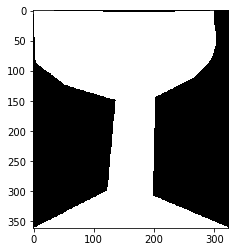

In [116]:
plt.imshow(im_in)

In [117]:
im_in = np.array(im_in)
print(im_in.shape)

(361, 324)


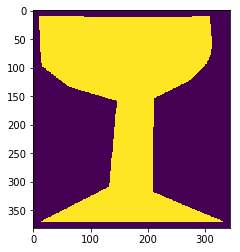

In [118]:
bordersize=10

mean= 0
im_in = cv2.copyMakeBorder(im_in, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv2.BORDER_CONSTANT, value=[mean,mean,mean] )

plt.imshow(im_in)


In [119]:
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
# im_in = cv2.bilateralFilter(im_in,9,75,75)

im_in = cv2.blur(im_in,(5,5))


th, im_in = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY);
# Copy the thresholded image.
im_floodfill = im_in.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_in.shape[:2]
print(h,w)
mask = np.zeros((h+2, w+2), np.uint8)
print(mask.shape)
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_in | im_floodfill_inv
# im_out = im_floodfill 

381 344
(383, 346)


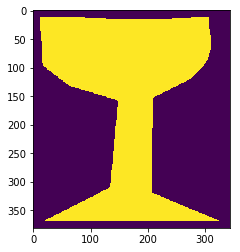

In [120]:
plt.imshow(im_in)


(381, 344)
(381, 344)


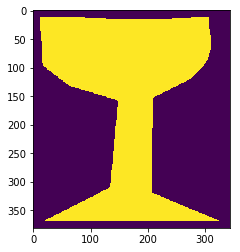

In [121]:
# plt.imshow(im_floodfill)
# plt.imshow( im_floodfill_inv)
plt.imshow( im_out)
print(im_in.shape)
print(im_out.shape)

In [122]:
im_out = Image.fromarray(np.uint8(cm.gist_earth(im_out)*255))
im_out = im_out.convert('RGB')


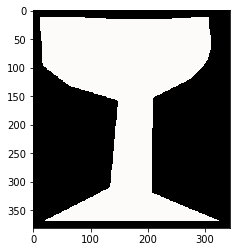

In [123]:
plt.imshow( im_out, cmap='gray')
im_out.save("out.jpeg")